In [1]:
# Import needed dependencies
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import time
from datetime import date
from bs4 import BeautifulSoup, Comment

In [2]:
hof_table_list = []
hof_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/hof.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
hof_table = soup.select_one('#div_hof')
        
# Grab data from table and put it into the list created above
for tr in hof_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    hof_table_list.append(tds)

for tr in hof_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    hof_table_header_list.append(ths)
    
final_hof_table_header_list = hof_table_header_list[0]
final_hof_table_header_list.pop(0)

hof_df = pd.DataFrame(hof_table_list, columns=final_hof_table_header_list)

hof_names = hof_df['Name'].to_list()

# cleaning_list = ['^(.*?)WNBA', '^(.*?)CBBplayer', '^(.*?)Coach', '^(.*?)CBBcoach', '^(.*?)Exec', '^(.*?)Ref', '^(.*?)Player', '^(.*?)Oly']
# temp_hof_name_list = []

# for name in hof_names:
# #     temp_name_holder = 'a'
#     cleaned_name = re.findall(r'^(.*?)\/', name)
#     if cleaned_name == []:
#         temp_hof_name_list.append(name)
#     else:
#         temp_hof_name_list.append(cleaned_name)

# new_temp_name_list = []

# for temp_name in temp_hof_name_list:
#     if type(temp_name) == list:
#         new_temp_name = str(temp_name[0])
#         new_temp_name_list.append(new_temp_name)
#     else:
#         new_temp_name_list.append(temp_name)

# cleaned_hof_name_list = []   

# for temp_name in new_temp_name_list:
#     name_holder = temp_name
#     counter = 0 
    
#     for string in cleaning_list:
#         new_cleaned_name = re.findall(string, temp_name)

#         if new_cleaned_name != []:
#             cleaned_hof_name_list.append(new_cleaned_name)
#             break
#         elif (new_cleaned_name == [] and counter == len(cleaning_list)):
#             cleaned_hof_name_list.append(name_holder)
#         else:
#             counter = counter + 1
#             continue

            
# final_temp_name_list = []

# for final_name in cleaned_hof_name_list:
#     if type(final_name) == list:
#         final_name_string = str(final_name[0])
#         final_temp_name_list.append(final_name_string)
#     else:
#         final_temp_name_list.append(final_name)

# hof_df = pd.DataFrame(final_temp_name_list, columns = ["Player"])
hof_df


,Name,,Voted By,Inducted As,Votes,% of Ballots
0,Fred McGriff,1963-Living,Contemporary Era,Player,,
1,Scott Rolen,1975-Living,BBWAA,Player,297.0,76.3%
2,Bud Fowler,1858-1913,Early Baseball Era,Pioneer/Executive,,
3,Gil Hodges,1924-1972,Golden Days Era,Player,,
4,Jim Kaat,1938-Living,Golden Days Era,Player,,
...,...,...,...,...,...,...
337,Ty Cobb,1886-1961,BBWAA,Player,222.0,98.2%
338,Walter Johnson,1887-1946,BBWAA,Player,189.0,83.6%
339,Christy Mathewson,1880-1925,BBWAA,Player,205.0,90.7%
340,Babe Ruth,1895-1948,BBWAA,Player,215.0,95.1%


In [3]:
mvp_table_list = []
mvp_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/mvp.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
mvp_table = soup.select_one('#all_mvp')
        
# Grab data from table and put it into the list created above
for tr in mvp_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    mvp_table_list.append(tds)

for tr in mvp_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    mvp_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

mvp_player_list = []
mvp_year_list = []
league_list = []
counter = 2

while counter < len(mvp_table_header_list):
    if mvp_table_header_list[counter] != ['']:
        mvp_year_list.append(mvp_table_header_list[counter][0])
    counter = counter + 1
        

for item in mvp_table_list:
    if item[0] != '':
        mvp_player_list.append(item[1])
        league_list.append(item[0])
#         mvp_year_list.append(current_season)
    else:
        current_season = current_season - 1
    
mvp_df = pd.DataFrame(
    {'Year': mvp_year_list,
     'Player': mvp_player_list,
     'League': league_list
    })

mvp_df

,Year,Player,League
0,2022,Aaron Judge,AL
1,2022,Paul Goldschmidt,NL
2,2021,Shohei Ohtani,AL
3,2021,Bryce Harper,NL
4,2020,José Abreu,AL
...,...,...,...
201,1913,Jake Daubert,NL
202,1912,Tris Speaker,AL
203,1912,Larry Doyle,NL
204,1911,Ty Cobb,AL


In [4]:
cya_table_list = []
cya_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/cya.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
cya_table = soup.select_one('#div_cya')
        
# Grab data from table and put it into the list created above
for tr in cya_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    cya_table_list.append(tds)

for tr in cya_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    cya_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

cya_player_list = []
cya_year_list = []
league_list = []
counter = 1

while counter < len(cya_table_header_list):
    if cya_table_header_list[counter] != ['']:
        cya_year_list.append(cya_table_header_list[counter][0])
    counter = counter + 1
        

for item in cya_table_list:
    if item[0] != '':
        cya_player_list.append(item[1])
        league_list.append(item[0])
    else:
        current_season = current_season - 1
    
cya_df = pd.DataFrame(
    {'Year': cya_year_list,
     'Player': cya_player_list,
     'League': league_list
    })

cya_df   

,Year,Player,League
0,2022,Justin Verlander,AL
1,2022,Sandy Alcantara,NL
2,2021,Robbie Ray,AL
3,2021,Corbin Burnes,NL
4,2020,Shane Bieber,AL
...,...,...,...
119,1960,Vern Law,ML
120,1959,Early Wynn,ML
121,1958,Bob Turley,ML
122,1957,Warren Spahn,ML


In [5]:
batting_champs_table_list = []
batting_champs_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/batting-titles.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
batting_champs_table = soup.select_one('#div_titleist')
        
# Grab data from table and put it into the list created above
for tr in batting_champs_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    batting_champs_table_list.append(tds)

for tr in batting_champs_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    batting_champs_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

batting_champs_player_list = []
batting_champs_year_list = []
league_list = []
counter = 0
slash_list = []

while counter < len(batting_champs_table_list[0]):
    if batting_champs_table_list[0][counter] == '':
        batting_champs_year_list.append(batting_champs_table_list[0][counter - 4])
    else:
        batting_champs_year_list.append(batting_champs_table_list[0][counter])
        
    league_list.append(batting_champs_table_list[0][counter + 1])
    batting_champs_player_list.append(batting_champs_table_list[0][counter + 2])
    slash_list.append(batting_champs_table_list[0][counter + 3])

    counter = counter + 4
            
batting_champs_df = pd.DataFrame(
    {'Year': batting_champs_year_list,
     'Player': batting_champs_player_list,
     'League': league_list,
     'Details': slash_list
    })

batting_champs_df #.sort_values('Year', ascending = False)   

,Year,Player,League,Details
0,2022,Luis Arraez,AL,MIN 144 G .316/.375/.420
1,2022,Jeff McNeil,NL,NYM 148 G .326/.382/.454
2,2021,Yuli Gurriel,AL,HOU 143 G .319/.383/.462
3,2021,Trea Turner,NL,TOT 148 G .328/.375/.536
4,2020,DJ LeMahieu,AL,NYY 50 G .364/.421/.590
...,...,...,...,...
332,1875,Deacon White,NA,BOS 80 G .367/.372/.453
333,1874,Levi Meyerle,NA,CHI 53 G .394/.401/.488
334,1873,Ross Barnes,NA,BOS 60 G .431/.465/.616
335,1872,Ross Barnes,NA,BOS 45 G .430/.452/.583


In [6]:
nl_gg_table_list = []
nl_gg_table_header_list = []

today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/gold_glove_nl.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
nl_gg_table = soup.select_one('#div_award_grid')
        
# Grab data from table and put it into the list created above
for tr in nl_gg_table.select('tr:has(td)'):
 
    try:
        temp_list = []

        for td in tr.find_all('td'):
            try:
                test3 = td.find('a').get('title') 
                temp_list.append(test3)
            except:
                continue

        # test_list   
        # test_list[0] = current_season

        cleaned_list = []

        for item in temp_list:
            temp_item = re.findall(r"^(.+?),", str(item))
            cleaned_list.append(temp_item)

        cleaned_list[0] = [current_season]
        final_player_list = []

        for item2 in cleaned_list:
            final_player_list.append(item2[0])


        nl_gg_table_list.append(final_player_list)
        current_season = current_season - 1
    except:
        continue

#     if td.attr('title') == True:
#         tds = [td.attr('title')(strip=True) for td in tr.select('td')]
#         nl_gg_table_list.append(tds)

#     tds = [td.get_text(strip=True) for td in tr.select('td')]
#     nl_gg_table_list.append(tds)

# for tr in nl_gg_table.find_all('tr'):
#     for td in tr.find_all('td'):
#         nl_gg_table_list.append((td.get('title')))

    
for tr in nl_gg_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    nl_gg_table_header_list.append(ths)
    

# nl_gg_player_list = []
# nl_gg_year_list = []
# league_list = []
# # counter = 0
# slash_list = []

# while counter < len(nl_gg_table_list[0]):
#     if nl_gg_table_list[0][counter] == '':
#         nl_gg_year_list.append(nl_gg_table_list[0][counter - 4])
#     else:
#         nl_gg_year_list.append(nl_gg_table_list[0][counter])
        
#     league_list.append(nl_gg_table_list[0][counter + 1])
#     nl_gg_player_list.append(nl_gg_table_list[0][counter + 2])
#     slash_list.append(nl_gg_table_list[0][counter + 3])

#     counter = counter + 4


# for item in nl_gg_table_list:
# #     if item[0] != '':
#     nl_gg_player_list.append(item[1])
#     league_list.append(item[0])
# #     else:
#     current_season = current_season - 1



nl_gg_df = pd.DataFrame(nl_gg_table_list, columns = nl_gg_table_header_list)

nl_gg_df #.sort_values('Year', ascending = False)   



,Year & Common,P,C,1B,2B,3B,SS,OF,OF,OF,Utility,Team
0,2022,Max Fried,J.T. Realmuto,Christian Walker,Brendan Rodgers,Nolan Arenado,Dansby Swanson,Ian Happ,Trent Grisham,Mookie Betts,Brendan Donovan,St. Louis Cardinals
1,2021,Max Fried,Jacob Stallings,Paul Goldschmidt,Tommy Edman,Nolan Arenado,Brandon Crawford,Tyler O'Neill,Adam Duvall,Harrison Bader,St. Louis Cardinals,None
2,2020,Max Fried,Tucker Barnhart,Anthony Rizzo,Kolten Wong,Nolan Arenado,Javier Báez,Tyler O'Neill,Trent Grisham,Mookie Betts,Chicago Cubs,None
3,2019,Zack Greinke,J.T. Realmuto,Anthony Rizzo,Kolten Wong,Nolan Arenado,Nick Ahmed,Lorenzo Cain,Cody Bellinger,David Peralta,None,None
4,2018,Zack Greinke,Yadier Molina,Anthony Rizzo,DJ LeMahieu,Nolan Arenado,Nick Ahmed,Nick Markakis,Corey Dickerson,Ender Inciarte,Freddie Freeman,None
...,...,...,...,...,...,...,...,...,...,...,...,...
61,1961,Bobby Shantz,John Roseboro,Bill White,Bill Mazeroski,Ken Boyer,Maury Wills,Willie Mays,Vada Pinson,Roberto Clemente,None,None
62,1960,Harvey Haddix,Del Crandall,Bill White,Bill Mazeroski,Ken Boyer,Ernie Banks,Wally Moon,Willie Mays,Henry Aaron,None,None
63,1959,Harvey Haddix,Del Crandall,Gil Hodges,Charlie Neal,Ken Boyer,Roy McMillan,Willie Mays,Jackie Brandt,Henry Aaron,None,None
64,1958,Harvey Haddix,Del Crandall,Gil Hodges,Bill Mazeroski,Ken Boyer,Roy McMillan,Willie Mays,Frank Robinson,Henry Aaron,None,None


In [7]:
al_gg_table_list = []
al_gg_table_header_list = []

today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/gold_glove_al.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
al_gg_table = soup.select_one('#div_award_grid')
        
# Grab data from table and put it into the list created above
for tr in al_gg_table.select('tr:has(td)'):
 
    try:
        temp_list = []

        for td in tr.find_all('td'):
            try:
                test3 = td.find('a').get('title') 
                temp_list.append(test3)
            except:
                continue

        cleaned_list = []

        for item in temp_list:
            temp_item = re.findall(r"^(.+?),", str(item))
            cleaned_list.append(temp_item)

        cleaned_list[0] = [current_season]
        final_player_list = []

        for item2 in cleaned_list:
            final_player_list.append(item2[0])


        al_gg_table_list.append(final_player_list)
        current_season = current_season - 1
    except:
        continue

for tr in al_gg_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    al_gg_table_header_list.append(ths)

al_gg_df = pd.DataFrame(al_gg_table_list, columns = al_gg_table_header_list)

al_gg_df   



,Year & Common,P,C,1B,2B,3B,SS,OF,OF,OF,Utility,Team
0,2022,Shane Bieber,Jose Trevino,Vladimir Guerrero Jr.,Andrés Giménez,Ramón Urías,Jeremy Peña,Kyle Tucker,Myles Straw,Steven Kwan,DJ LeMahieu,New York Yankees
1,2021,Dallas Keuchel,Sean Murphy,Yuli Gurriel,Marcus Semien,Matt Chapman,Carlos Correa,Michael A. Taylor,Joey Gallo,Andrew Benintendi,Houston Astros,None
2,2020,Griffin Canning,Roberto Pérez,Evan White,César Hernández,Isiah Kiner-Falefa,J.P. Crawford,Alex Gordon,Luis Robert Jr.,Joey Gallo,Cleveland Indians,None
3,2019,Mike Leake,Roberto Pérez,Matt Olson,Yolmer Sanchez,Matt Chapman,Francisco Lindor,Alex Gordon,Kevin Kiermaier,Mookie Betts,None,None
4,2018,Dallas Keuchel,Salvador Perez,Matt Olson,Ian Kinsler,Matt Chapman,Andrelton Simmons,Alex Gordon,Jackie Bradley Jr.,Mookie Betts,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
61,1961,Frank Lary,Earl Battey,Vic Power,Bobby Richardson,Brooks Robinson,Luis Aparicio,Jim Piersall,Jim Landis,Al Kaline,None,None
62,1960,Bobby Shantz,Earl Battey,Vic Power,Nellie Fox,Brooks Robinson,Luis Aparicio,Roger Maris,Minnie Minoso,Jim Landis,None,None
63,1959,Bobby Shantz,Sherm Lollar,Vic Power,Nellie Fox,Frank Malzone,Luis Aparicio,Minnie Minoso,Al Kaline,Jackie Jensen,None,None
64,1958,Bobby Shantz,Sherm Lollar,Vic Power,Frank Bolling,Frank Malzone,Luis Aparicio,Jim Piersall,Norm Siebern,Al Kaline,None,None


In [8]:
roy_table_list = []
roy_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/roy.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
roy_table = soup.select_one('#div_roy')
        
# Grab data from table and put it into the list created above
for tr in roy_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    roy_table_list.append(tds)

for tr in roy_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    roy_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

roy_player_list = []
roy_year_list = []
league_list = []
counter = 1

while counter < len(roy_table_header_list):
    if roy_table_header_list[counter] != ['']:
        roy_year_list.append(roy_table_header_list[counter][0])
    counter = counter + 1
        

for item in roy_table_list:
    if item[0] != '':
        roy_player_list.append(item[1])
        league_list.append(item[0])
    else:
        current_season = current_season - 1

roy_year_list.pop(0)
        
roy_df = pd.DataFrame(
    {'Year': roy_year_list,
     'Player': roy_player_list,
     'League': league_list
    })

roy_df   

,Year,Player,League
0,2022,Julio Rodríguez,AL
1,2022,Michael Harris II,NL
2,2021,Randy Arozarena,AL
3,2021,Jonathan India,NL
4,2020,Kyle Lewis,AL
...,...,...,...
147,1950,Sam Jethroe,NL
148,1949,Roy Sievers,AL
149,1949,Don Newcombe,NL
150,1948,Al Dark,ML


In [9]:
RLOY_table_list = []
RLOY_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/reliever.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
RLOY_table = soup.select_one('#div_reliever')
        
# Grab data from table and put it into the list created above
for tr in RLOY_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    RLOY_table_list.append(tds)

for tr in RLOY_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    RLOY_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

RLOY_player_list = []
RLOY_year_list = []
league_list = []
counter = 1

while counter < len(RLOY_table_header_list):
    if RLOY_table_header_list[counter] != ['']:
        RLOY_year_list.append(RLOY_table_header_list[counter][0])
    counter = counter + 1
        

for item in RLOY_table_list:
    if item[0] != '':
        RLOY_player_list.append(item[1])
        league_list.append(item[0])
    else:
        current_season = current_season - 1

# RLOY_year_list.pop(0)
        
RLOY_df = pd.DataFrame(
    {'Year': RLOY_year_list,
     'Player': RLOY_player_list,
     'League': league_list
    })

RLOY_df   

,Year,Player,League
0,2022,Emmanuel Clase,AL
1,2022,Edwin Díaz,NL
2,2021,Liam Hendriks,AL
3,2021,Josh Hader,NL
4,2020,Liam Hendriks,AL
...,...,...,...
88,1978,Rollie Fingers,NL
89,1977,Bill Campbell,AL
90,1977,Rollie Fingers,NL
91,1976,Bill Campbell,AL


In [10]:
ERA_champs_table_list = []
ERA_champs_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/pitching-era-titles.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
ERA_champs_table = soup.select_one('#div_titleist')
        
# Grab data from table and put it into the list created above
for tr in ERA_champs_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    ERA_champs_table_list.append(tds)

for tr in ERA_champs_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    ERA_champs_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

ERA_champs_player_list = []
ERA_champs_year_list = []
league_list = []
counter = 0
slash_list = []

while counter < len(ERA_champs_table_list[0]):
    if ERA_champs_table_list[0][counter] == '':
        ERA_champs_year_list.append(ERA_champs_table_list[0][counter - 4])
    else:
        ERA_champs_year_list.append(ERA_champs_table_list[0][counter])
        
    league_list.append(ERA_champs_table_list[0][counter + 1])
    ERA_champs_player_list.append(ERA_champs_table_list[0][counter + 2])
    slash_list.append(ERA_champs_table_list[0][counter + 3])

    counter = counter + 4
            
ERA_champs_df = pd.DataFrame(
    {'Year': ERA_champs_year_list,
     'Player': ERA_champs_player_list,
     'League': league_list,
     'Details': slash_list
    })

ERA_champs_df   

,Year,Player,League,Details
0,2022,Justin Verlander,AL,"HOU 18-4, 1.75, 185 SO"
1,2022,Julio Urías,NL,"LAD 17-7, 2.16, 166 SO"
2,2021,Robbie Ray,AL,"TOR 13-7, 2.84, 248 SO"
3,2021,Corbin Burnes,NL,"MIL 11-5, 2.43, 234 SO"
4,2020,Shane Bieber,AL,"CLE 8-1, 1.63, 122 SO"
...,...,...,...,...
332,1875,Pud Galvin,NA,"STL 4-2 (1 SV), 1.16, 8 SO"
333,1874,Dick McBride,NA,"ATH 33-22, 1.64, 37 SO"
334,1873,Cherokee Fisher,NA,"ATH 3-4 (2 SV), 1.81, 14 SO"
335,1872,Cherokee Fisher,NA,"BAL 10-1 (1 SV), 1.80, 20 SO"


In [11]:
al_ss_table_list = []
al_ss_table_header_list = []

today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/silver_slugger_al.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
al_ss_table = soup.select_one('#div_award_grid')
        
# Grab data from table and put it into the list created above
for tr in al_ss_table.select('tr:has(td)'):
 
    try:
        temp_list = []

        for td in tr.find_all('td'):
            try:
                test3 = td.find('a').get('title') 
                temp_list.append(test3)
            except:
                continue

        cleaned_list = []

        for item in temp_list:
            temp_item = re.findall(r"^(.+?),", str(item))
            cleaned_list.append(temp_item)

        cleaned_list[0] = [current_season]
        final_player_list = []

        for item2 in cleaned_list:
            final_player_list.append(item2[0])


        al_ss_table_list.append(final_player_list)
        current_season = current_season - 1
    except:
        continue

for tr in al_ss_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    al_ss_table_header_list.append(ths)

al_ss_table_header_list[0].remove('Team')
    
al_ss_df = pd.DataFrame(al_ss_table_list, columns = al_ss_table_header_list)

al_ss_df   



,Year & Common,C,1B,2B,3B,SS,OF,OF,OF,DH,Utility
0,2022,Alejandro Kirk,Nathaniel Lowe,Jose Altuve,José Ramírez,Xander Bogaerts,Julio Rodríguez,Aaron Judge,Mike Trout,Yordan Alvarez,Luis Arraez
1,2021,Salvador Perez,Vladimir Guerrero Jr.,Marcus Semien,Rafael Devers,Xander Bogaerts,Teoscar Hernández,Cedric Mullins,Aaron Judge,Shohei Ohtani,None
2,2020,Salvador Perez,José Abreu,DJ LeMahieu,José Ramírez,Tim Anderson,Teoscar Hernández,Eloy Jiménez,Mike Trout,Nelson Cruz,None
3,2019,Mitch Garver,Carlos Santana,DJ LeMahieu,Alex Bregman,Xander Bogaerts,George Springer,Mike Trout,Mookie Betts,Nelson Cruz,None
4,2018,Salvador Perez,José Abreu,Jose Altuve,José Ramírez,Francisco Lindor,J.D. Martinez,Mike Trout,Mookie Betts,J.D. Martinez,None
5,2017,Gary Sanchez,Eric Hosmer,Jose Altuve,José Ramírez,Francisco Lindor,Justin Upton,George Springer,Aaron Judge,Nelson Cruz,None
6,2016,Salvador Perez,Miguel Cabrera,Jose Altuve,Josh Donaldson,Xander Bogaerts,Mark Trumbo,Mike Trout,Mookie Betts,David Ortiz,None
7,2015,Brian McCann,Miguel Cabrera,Jose Altuve,Josh Donaldson,Xander Bogaerts,J.D. Martinez,Nelson Cruz,Mike Trout,Kendrys Morales,None
8,2014,Yan Gomes,José Abreu,Jose Altuve,Adrián Beltré,Alexei Ramírez,José Bautista,Michael Brantley,Mike Trout,Victor Martinez,None
9,2013,Joe Mauer,Chris Davis,Robinson Canó,Miguel Cabrera,J.J. Hardy,Torii Hunter,Adam Jones,Mike Trout,David Ortiz,None


In [12]:
nl_ss_table_list = []
nl_ss_table_header_list = []

today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/silver_slugger_nl.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
nl_ss_table = soup.select_one('#div_award_grid')
        
# Grab data from table and put it into the list created above
for tr in nl_ss_table.select('tr:has(td)'):
 
    try:
        temp_list = []

        for td in tr.find_all('td'):
            try:
                test3 = td.find('a').get('title') 
                temp_list.append(test3)
            except:
                continue

        cleaned_list = []

        for item in temp_list:
            temp_item = re.findall(r"^(.+?),", str(item))
            cleaned_list.append(temp_item)

        cleaned_list[0] = [current_season]
        final_player_list = []

        for item2 in cleaned_list:
            final_player_list.append(item2[0])


        nl_ss_table_list.append(final_player_list)
        current_season = current_season - 1
    except:
        continue

for tr in nl_ss_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    nl_ss_table_header_list.append(ths)

nl_ss_table_header_list[0].remove('Team')
nl_ss_table_list[0].insert(1, "None")
    
nl_ss_df = pd.DataFrame(nl_ss_table_list, columns = nl_ss_table_header_list)

nl_ss_df   

    

,Year & Common,P,C,1B,2B,3B,SS,OF,OF,OF,DH,Utility
0,2022,None,J.T. Realmuto,Paul Goldschmidt,Jeff McNeil,Nolan Arenado,Trea Turner,Juan Soto,Kyle Schwarber,Mookie Betts,Josh Bell,Brandon Drury
1,2021,Max Fried,Buster Posey,Freddie Freeman,Ozzie Albies,Austin Riley,Fernando Tatis Jr.,Bryce Harper,Nick Castellanos,Juan Soto,None,None
2,2020,Marcell Ozuna,Travis d'Arnaud,Freddie Freeman,Donovan Solano,Manny Machado,Fernando Tatis Jr.,Ronald Acuna Jr.,Juan Soto,Mookie Betts,None,None
3,2019,Zack Greinke,J.T. Realmuto,Freddie Freeman,Ozzie Albies,Anthony Rendon,Trevor Story,Ronald Acuna Jr.,Christian Yelich,Cody Bellinger,None,None
4,2018,Germán Márquez,J.T. Realmuto,Paul Goldschmidt,Javier Báez,Nolan Arenado,Trevor Story,Christian Yelich,Nick Markakis,David Peralta,None,None
5,2017,Adam Wainwright,Buster Posey,Paul Goldschmidt,Daniel Murphy,Nolan Arenado,Corey Seager,Marcell Ozuna,Giancarlo Stanton,Charlie Blackmon,None,None
6,2016,Jake Arrieta,Wilson Ramos,Anthony Rizzo,Daniel Murphy,Nolan Arenado,Corey Seager,Christian Yelich,Yoenis Céspedes,Charlie Blackmon,None,None
7,2015,Madison Bumgarner,Buster Posey,Paul Goldschmidt,Dee Strange-Gordon,Nolan Arenado,Brandon Crawford,Bryce Harper,Carlos González,Andrew McCutchen,None,None
8,2014,Madison Bumgarner,Buster Posey,Adrián González,Neil Walker,Anthony Rendon,Ian Desmond,Justin Upton,Giancarlo Stanton,Andrew McCutchen,None,None
9,2013,Zack Greinke,Yadier Molina,Paul Goldschmidt,Matt Carpenter,Pedro Álvarez,Ian Desmond,Jay Bruce,Michael Cuddyer,Andrew McCutchen,None,None


In [13]:
all_MLB_table_list = []
all_MLB_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/all_mlb.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
all_MLB_table = soup.select_one('#div_all_mlb')
        
# Grab data from table and put it into the list created above
for tr in all_MLB_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    all_MLB_table_list.append(tds)

for tr in all_MLB_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    all_MLB_table_header_list.append(ths)

year_list = []
i = 1
while i < (len(all_MLB_table_header_list)):
    year_list.append(all_MLB_table_header_list[i][0])
    i = i + 1

for j in range(len(all_MLB_table_list)):
    all_MLB_table_list[j].insert(0, year_list[j])
    j = j + 1
    

all_MLB_df = pd.DataFrame(all_MLB_table_list, columns = all_MLB_table_header_list[0])
all_MLB_df

,Year,Team,SP,SP,SP,SP,SP,RP,RP,C,1B,2B,3B,SS,OF,OF,OF,DH
0,2022,1st,Alcantara,Manoah,Ohtani,Valdez,Verlander,Clase,Díaz,Realmuto,Goldschmidt,Altuve,Machado,Turner,Betts,Judge,Trout,Alvarez
1,2022,2nd,Cease,Fried,Nola,Scherzer,Urías,Helsley,Pressly,Smith,Freeman,Giménez,Arenado,Lindor,Rodríguez,Schwarber,Tucker,Ohtani
2,2021,1st,Buehler,Burnes,Cole,Ray,Scherzer,Hader,Hendriks,Perez,Guerrero,Semien,Riley,Tatís,Harper,Judge,Soto,Ohtani
3,2021,2nd,Fried,Gausman,Ohtani,Urías,Wheeler,Iglesias,Jansen,Posey,Freeman,Albies,Devers,Turner,Castellanos,Hernández,Tucker,Alvarez
4,2020,1st,Bauer,Bieber,Darvish,deGrom,Fried,Anderson,Hendriks,Perez,Freeman,LeMahieu,Machado,Tatís,Betts,Soto,Trout,Ozuna
5,2020,2nd,Cole,Kershaw,Lamet,Maeda,Ryu,Hand,Williams,Realmuto,Abreu,Lowe,Ramírez,Seager,Acuña,Conforto,Yastrzemski,Cruz
6,2019,1st,Cole,deGrom,Scherzer,Strasburg,Verlander,Hader,Yates,Realmuto,Alonso,LeMahieu,Rendon,Bogaerts,Bellinger,Trout,Yelich,Cruz
7,2019,2nd,Flaherty,Greinke,Morton,Ryu,Soroka,Chapman,Hendriks,Grandal,Freeman,Altuve,Bregman,Semien,Acuña,Betts,Soto,Alvarez


In [14]:

    
clemente_award_table_list = []
clemente_award_table_header_list = []

# input URL and use BeautifulSoup to parse through the page
url = f'https://www.baseball-reference.com/awards/clemente.shtml'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# Grab the table element that has NBA player statistics
clemente_award_table = soup.select_one('#div_clemente')
        
# Grab data from table and put it into the list created above
for tr in clemente_award_table.select('tr:has(td)'):
    tds = [td.get_text(strip=True) for td in tr.select('td')]
    clemente_award_table_list.append(tds)

for tr in clemente_award_table.select('tr:has(th)'):
    ths = [th.get_text(strip=True) for th in tr.select('th')]
    clemente_award_table_header_list.append(ths)
    
today = date.today()

# dd/mm/YY
if int(today.strftime("%M")) > 11:
    current_season = int(today.strftime("%Y"))
else:
    current_season = (int(today.strftime("%Y")) - 1)

clemente_award_player_list = []
clemente_award_year_list = []
league_list = []
counter = 0
slash_list = []

     
clemente_award_table_header_list[1].pop(0)
clemente_award_df = pd.DataFrame(clemente_award_table_list, columns = clemente_award_table_header_list[1])


year_list = []
i = 2
while i < (len(clemente_award_table_header_list)):
    if clemente_award_table_header_list[i][0] == '':
        i = i + 1
    else:
        year_list.append(clemente_award_table_header_list[i][0])
        i = i + 1

clemente_award_df = clemente_award_df[clemente_award_df.Name != '']
clemente_award_df.insert(0, "Year", year_list)


clemente_award_df

,Year,Lg,Name,Tm,WAR,BA,OBP,SLG,HR,RBI,SB,W,L,SV,ERA,IP,SO
0,2022,ML,Justin Turner,LAD,2.0,.278,.350,.438,13,81,3,,,,,,
2,2021,ML,Nelson Cruz,"MIN,TBR",2.5,.265,.334,.497,32,86,3,,,,,,
4,2020,ML,Adam Wainwright,STL,0.5,,,,,,,5,3,0,3.15,65.2,54
6,2019,ML,Carlos Carrasco,CLE,0.1,,,,,,,6,7,1,5.29,80.0,96
8,2018,ML,Yadier Molina,STL,1.5,.261,.314,.436,20,74,4,,,,,,
10,2017,ML,Anthony Rizzo,CHC,4.5,.273,.392,.507,32,109,10,,,,,,
12,2016,ML,Curtis Granderson,NYM,2.8,.237,.335,.464,30,59,4,,,,,,
14,2015,ML,Andrew McCutchen,PIT,5.0,.292,.401,.488,23,96,11,,,,,,
16,2014,ML,Paul Konerko,CHW,-0.7,.207,.254,.317,5,22,0,,,,,,
17,2014,ML,Jimmy Rollins,PHI,4.1,.243,.323,.394,17,55,28,,,,,,


In [37]:
allstar_table_list = []

today = date.today()

# dd/mm/YY
allstar_year = int(today.strftime("%Y"))
if int(today.strftime("%m")) < 3:
    allstar_year = allstar_year - 1

start_year = 1933

while start_year <= allstar_year:   
    
    if counter > 2:
        counter = 1
        print("Counter Reverted")
    else:
        print(f"It worked: {counter} - {start_year}")
        
    if start_year == 1959 or start_year == 1960 or start_year == 1961 or start_year == 1962:
        url = f'https://www.baseball-reference.com/allstar/{start_year}-allstar-game-{counter}.shtml'
        counter = counter + 1
        
        if counter > 2:
            two_allstar_year = "No"
        else:
            two_allstar_year = "Yes"
    else:
        url = f'https://www.baseball-reference.com/allstar/{start_year}-allstar-game.shtml'
        counter = 1
        two_allstar_year = "No"
#     else:
#         print(f"It didn't worked: {counter} - {start_year}")
#         start_year = start_year + 1
#         url = f'https://www.baseball-reference.com/allstar/{start_year}-allstar-game.shtml'
#         counter = 1
#         two_allstar_year = "No"
    
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')

    # Grab the table element that has MLB player statistics
    allstar_table = soup.select_one('#all_lineups')

    comment = allstar_table.find(text=lambda text: isinstance(text, Comment))
    if comment.find("table") > 0:
            comment_soup = BeautifulSoup(comment, 'html.parser')
            table = comment_soup.find_all("table")

    # Grab data from table and put it into the list created above
    for tr in table[0].select('tr:has(td)'):
        tds = [td.get_text(strip=True) for td in tr.select('td')]
        allstar_table_list.append(tds)
        
    for tr in table[1].select('tr:has(td)'):
        tds = [td.get_text(strip=True) for td in tr.select('td')]
        allstar_table_list.append(tds)
        
    allstar_table_list.append(start_year)

    if start_year == 1944 or start_year == 2019:
        start_year = start_year + 2
    elif two_allstar_year == "Yes":
        continue
    else:
        start_year = start_year + 1
    
    time.sleep(3)


allstar_teams_list = []
i = 0

while i <= (len(allstar_table_list)-1):
    allstar_teams_list.append(((allstar_table_list[i] + allstar_table_list[(i+1)]),allstar_table_list[(i+2)]))
    i = i + 3

allstar_df = pd.DataFrame(allstar_teams_list, columns = ('All_Stars','Year'))
allstar_df      

It worked: 1 - 1933


AttributeError: 'NoneType' object has no attribute 'find'


<!DOCTYPE html>

<html class="no-js" data-root="" data-version="klecko-" lang="en">
<head id="suppress_all_ads">
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<title>Rate Limited Request (429 error) | Sports-Reference.com</title>
<link href="https://www.sports-reference.com/429.html" rel="canonical"/>
<!-- CSS start -->
<style>body,html{color:#000;font:14px/1.25 Helvetica Neue,helvetica,arial,sans-serif;margin:0;padding:0}html:not(.backstop){scroll-behavior:smooth}html:not(.backstop) div,html:not(.backstop) span{scroll-snap-margin:2.5em 0 0 0;scroll-margin:2.5em 0 0 0}body{-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none;background:#c9cbcd;position:relative;z-index:0}a img{border:0}li,ol,ul{list-style-type:none;margin:0;padding:0}table td,table th{border:0}iframe{max-width:100%}code{background:#eee}a,button,input,label,select,summ
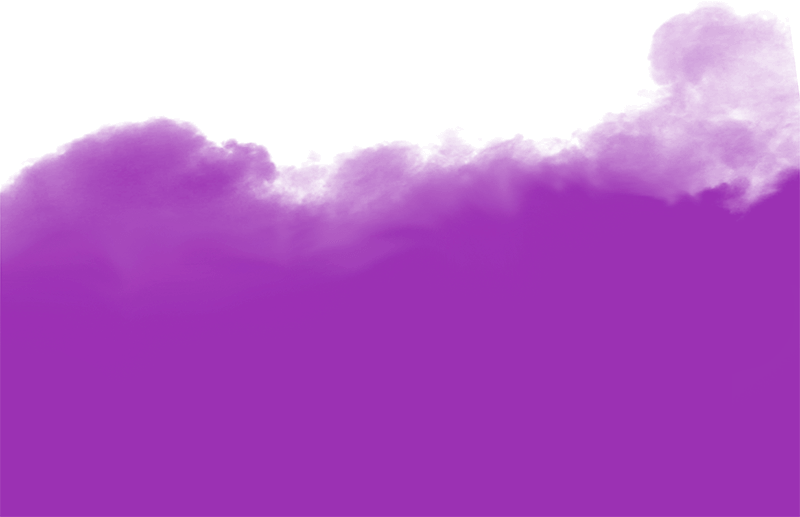

In [40]:
# start_year
# url
# allstar_table
# counter < 3
# start_year == 1959
# two_allstar_year
soup
# counter
# allstar_year
# start_year <= allstar_year

In [ ]:
# hof_df.to_csv('nba_hof.csv')
# mvp_df.to_csv('nba_mvp.csv')
# all_league_df.to_csv('all_league_players.csv')
# allstar_df.to_csv('allstars.csv')
# agg_dpoy_seen_df.to_csv('dpoy.csv')